## Business Understanding

In contemporary society, the issue of racial discrimination within law enforcement agencies has become a matter of significant concern and scrutiny. Instances of biased treatment, particularly during police stops and arrests, have sparked widespread debate and raised questions about the fairness and equity of policing practices. Understanding the prevalence and impact of racial discrimination within police forces is crucial for promoting accountability, fostering trust between communities and law enforcement, and ultimately working towards a more just and equitable society.

This project aims to delve into the complex dynamics of racial discrimination within law enforcement, with a specific focus on analyzing its impact on arrest outcomes. By examining data on police stops, including the race or ethnicity of officers and perceived race of subjects, alongside stop resolutions and geographical information, we seek to uncover patterns and disparities that may exist within these encounters. Through rigorous analysis and interpretation of the data, we aim to raise awareness about the prevalence of racial discrimination within the police force and advocate for reforms aimed at promoting fair and unbiased policing practices. Ultimately, our goal is to contribute to the ongoing dialogue surrounding racial equity in law enforcement and drive positive change within the criminal justice system.


![race relations](https://images.wydaily.com/wp-content/uploads/2020/06/101762390_4540596685966256_3329579920555769856_o-e1591204104374.jpg)

[Presentation on race relations in law enforcement](https://docs.google.com/presentation/d/1lV9AtDNA0W6l02kRQqonR0q1cLLrOQydTKWeztOJaHI/edit#slide=id.g2c07346b177_1_0)


In [1]:
#importing liblaries
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB


### DATA UNDERSTANDING

This data understanding phase sets the foundation for subsequent analysis, enabling us to identify relevant features and formulate meaningful research questions to investigate racial discrimination within law enforcement. 

In [2]:
# getting my dataset
file_path = "C:\\Users\\HP\\Desktop\\terry dtops data\\Terry_Stops_20240301.csv"
df = pd.read_csv(file_path)

df

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,36 - 45,-1,20160000157346,152518,Arrest,Lethal Cutting Instrument,6092,1956,M,Hispanic or Latino,...,14:05:00.0000000,BURG - IP/JO - RES (INCL UNOCC STRUCTURES),--BURGLARY - RESIDENTIAL OCCUPIED,911,SOUTHWEST PCT 2ND W - FRANK - PLATOON 2,N,Y,Southwest,W,W1
1,1 - 17,-1,20150000314276,80366,Arrest,NaN,7556,1982,M,White,...,01:52:00.0000000,LIQUOR VIOLATIONS - MINOR,--NARCOTICS - OTHER,ONVIEW,WEST PCT 3RD W - DAVID BEATS,N,N,West,Q,Q3
2,18 - 25,-1,20180000027784,381908,Arrest,NaN,5436,1963,M,White,...,19:56:00.0000000,BURG - RES (INCL UNOCC STRUCTURES ON PROP),"--BURGLARY - RESIDENTIAL, UNOCCUPIED",911,SOUTHWEST PCT 2ND W - WILLIAM - PLATOON 2,N,N,Southwest,W,W1
3,18 - 25,-1,20160000438058,217923,Offense Report,NaN,7713,1982,M,White,...,23:31:00.0000000,SHOPLIFT - THEFT,--THEFT - SHOPLIFT,911,NORTH PCT 3RD W - JOHN RELIEF,N,N,North,J,J2
4,26 - 35,-1,20150000198610,53289,Offense Report,NaN,5833,1969,M,White,...,19:11:00.0000000,FIGHT - JO - PHYSICAL (NO WEAPONS),--DISTURBANCE - FIGHT,911,NORTH PCT 2ND WATCH - B/N RELIEF,N,N,North,N,N3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59161,18 - 25,13175311362,20200000162573,13175348696,Arrest,-,8611,1981,M,White,...,16:27:01.0000000,FIGHT - IP - PHYSICAL (NO WEAPONS),--TRAFFIC - D.U.I.,911,WEST PCT 2ND W - QUEEN - PLATOON 1,Y,N,West,Q,Q1
59162,26 - 35,9661756808,20190000299445,9661732030,Field Contact,-,8639,1995,M,White,...,00:32:49.0000000,"DISTURBANCE, MISCELLANEOUS/OTHER",--PROPERTY DEST (DAMG),"TELEPHONE OTHER, NOT 911",WEST PCT 3RD W - QUEEN - PLATOON 1,N,N,West,Q,Q1
59163,56 and Above,-1,20180000378710,490222,Offense Report,NaN,8395,1989,M,White,...,01:40:00.0000000,ASSIST OTHER AGENCY - ROUTINE SERVICE,--CRISIS COMPLAINT - GENERAL,"TELEPHONE OTHER, NOT 911",EAST PCT 3RD W - E/G RELIEF,N,Y,East,G,G1
59164,26 - 35,-1,20190000011820,520845,Offense Report,NaN,8404,1984,M,White,...,19:15:00.0000000,ASLT - IP/JO - PERSON SHOT OR SHOT AT,--DRIVE BY SHOOTING - NO INJURIES,911,SOUTHWEST PCT 2ND W - WILLIAM - PLATOON 2,N,Y,Southwest,F,F1


In [3]:
df.head()

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,36 - 45,-1,20160000157346,152518,Arrest,Lethal Cutting Instrument,6092,1956,M,Hispanic or Latino,...,14:05:00.0000000,BURG - IP/JO - RES (INCL UNOCC STRUCTURES),--BURGLARY - RESIDENTIAL OCCUPIED,911,SOUTHWEST PCT 2ND W - FRANK - PLATOON 2,N,Y,Southwest,W,W1
1,1 - 17,-1,20150000314276,80366,Arrest,NaN,7556,1982,M,White,...,01:52:00.0000000,LIQUOR VIOLATIONS - MINOR,--NARCOTICS - OTHER,ONVIEW,WEST PCT 3RD W - DAVID BEATS,N,N,West,Q,Q3
2,18 - 25,-1,20180000027784,381908,Arrest,NaN,5436,1963,M,White,...,19:56:00.0000000,BURG - RES (INCL UNOCC STRUCTURES ON PROP),"--BURGLARY - RESIDENTIAL, UNOCCUPIED",911,SOUTHWEST PCT 2ND W - WILLIAM - PLATOON 2,N,N,Southwest,W,W1
3,18 - 25,-1,20160000438058,217923,Offense Report,NaN,7713,1982,M,White,...,23:31:00.0000000,SHOPLIFT - THEFT,--THEFT - SHOPLIFT,911,NORTH PCT 3RD W - JOHN RELIEF,N,N,North,J,J2
4,26 - 35,-1,20150000198610,53289,Offense Report,NaN,5833,1969,M,White,...,19:11:00.0000000,FIGHT - JO - PHYSICAL (NO WEAPONS),--DISTURBANCE - FIGHT,911,NORTH PCT 2ND WATCH - B/N RELIEF,N,N,North,N,N3


In [4]:
df.dtypes

Subject Age Group           object
Subject ID                   int64
GO / SC Num                  int64
Terry Stop ID                int64
Stop Resolution             object
Weapon Type                 object
Officer ID                  object
Officer YOB                  int64
Officer Gender              object
Officer Race                object
Subject Perceived Race      object
Subject Perceived Gender    object
Reported Date               object
Reported Time               object
Initial Call Type           object
Final Call Type             object
Call Type                   object
Officer Squad               object
Arrest Flag                 object
Frisk Flag                  object
Precinct                    object
Sector                      object
Beat                        object
dtype: object

In [5]:
df.columns

Index(['Subject Age Group', 'Subject ID', 'GO / SC Num', 'Terry Stop ID',
       'Stop Resolution', 'Weapon Type', 'Officer ID', 'Officer YOB',
       'Officer Gender', 'Officer Race', 'Subject Perceived Race',
       'Subject Perceived Gender', 'Reported Date', 'Reported Time',
       'Initial Call Type', 'Final Call Type', 'Call Type', 'Officer Squad',
       'Arrest Flag', 'Frisk Flag', 'Precinct', 'Sector', 'Beat'],
      dtype='object')

In [6]:
# Iterating over columns to identify categorical variables
for column in df.columns:
    if df[column].dtype == 'object':
        unique_values = df[column].unique()
        print(f"Unique values for {column}: {unique_values}")

Unique values for Subject Age Group: ['36 - 45' '1 - 17' '18 - 25' '26 - 35' '-' '56 and Above' '46 - 55']
Unique values for Stop Resolution: ['Arrest' 'Offense Report' 'Field Contact' 'Citation / Infraction'
 'Referred for Prosecution']
Unique values for Weapon Type: ['Lethal Cutting Instrument' nan '-' 'Taser/Stun Gun'
 'Knife/Cutting/Stabbing Instrument' 'Handgun' 'Firearm'
 'Blunt Object/Striking Implement' 'Firearm Other' 'Other Firearm'
 'Mace/Pepper Spray' 'None/Not Applicable'
 'Club, Blackjack, Brass Knuckles' 'Rifle' 'Club' 'Shotgun'
 'Fire/Incendiary Device' 'Firearm (unk type)' 'Automatic Handgun'
 'Brass Knuckles' 'Personal Weapons (hands, feet, etc.)' 'Blackjack'
 'Poison']
Unique values for Officer ID: ['6092' '7556' '5436' ... '6365' '5152' '5162']
Unique values for Officer Gender: ['M' 'F' 'N']
Unique values for Officer Race: ['Hispanic or Latino' 'White' 'American Indian/Alaska Native' 'Asian'
 'Two or More Races' 'Not Specified' 'Nat Hawaiian/Oth Pac Islander'
 'Blac

In [7]:
df.describe()

,Subject ID,GO / SC Num,Terry Stop ID,Officer YOB
count,5.916600e+04,5.916600e+04,5.916600e+04,59166.000000
mean,6.423902e+09,2.018498e+13,1.078652e+10,1983.917757
std,1.129047e+10,8.653188e+10,1.593028e+10,9.471445
min,-8.000000e+00,-1.000000e+00,2.802000e+04,1900.000000
25%,-1.000000e+00,2.016000e+13,2.308388e+05,1979.000000
50%,-1.000000e+00,2.018000e+13,4.969025e+05,1986.000000
75%,7.743341e+09,2.020000e+13,1.600413e+10,1991.000000
max,5.442487e+10,2.024000e+13,5.445969e+10,2002.000000


In [8]:
#checking for null values
missing_values = df.isnull().sum()
missing_values

Subject Age Group               0
Subject ID                      0
GO / SC Num                     0
Terry Stop ID                   0
Stop Resolution                 0
Weapon Type                 32565
Officer ID                      0
Officer YOB                     0
Officer Gender                  0
Officer Race                    0
Subject Perceived Race          0
Subject Perceived Gender        0
Reported Date                   0
Reported Time                   0
Initial Call Type               0
Final Call Type                 0
Call Type                       0
Officer Squad                 555
Arrest Flag                     0
Frisk Flag                      0
Precinct                        0
Sector                          0
Beat                            0
dtype: int64

In [9]:
# Checking for NaN values in the DataFrame
nan_values = df.isna().sum()

# columns with NaN values and their respective counts
print("Columns with NaN values:")
print(nan_values[nan_values > 0])


Columns with NaN values:
Weapon Type      32565
Officer Squad      555
dtype: int64


### Feature engineering 

When examining racial inequality in law enforcement, feature engineering is essential in locating pertinent features that accurately depict the subtleties of arrests and stops by the police.

In [10]:

# Creating a new feature indicating whether a weapon was involved in the stop
df['Weapon Involved'] = df['Weapon Type'].notnull().astype(int)


# Creating a new feature representing the geographical area of the stop by combining "Precinct", "Sector", and "Beat"
df['Geographical Area'] = df['Precinct'] + '-' + df['Sector'] + '-' + df['Beat']

print(df.head())


  Subject Age Group  Subject ID     GO / SC Num  Terry Stop ID  \
0           36 - 45          -1  20160000157346         152518   
1            1 - 17          -1  20150000314276          80366   
2           18 - 25          -1  20180000027784         381908   
3           18 - 25          -1  20160000438058         217923   
4           26 - 35          -1  20150000198610          53289   

  Stop Resolution                Weapon Type Officer ID  Officer YOB  \
0          Arrest  Lethal Cutting Instrument       6092         1956   
1          Arrest                        NaN       7556         1982   
2          Arrest                        NaN       5436         1963   
3  Offense Report                        NaN       7713         1982   
4  Offense Report                        NaN       5833         1969   

  Officer Gender        Officer Race  ...  \
0              M  Hispanic or Latino  ...   
1              M               White  ...   
2              M               Whit

In [11]:
df.head()

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat,Weapon Involved,Geographical Area
0,36 - 45,-1,20160000157346,152518,Arrest,Lethal Cutting Instrument,6092,1956,M,Hispanic or Latino,...,--BURGLARY - RESIDENTIAL OCCUPIED,911,SOUTHWEST PCT 2ND W - FRANK - PLATOON 2,N,Y,Southwest,W,W1,1,Southwest-W-W1
1,1 - 17,-1,20150000314276,80366,Arrest,NaN,7556,1982,M,White,...,--NARCOTICS - OTHER,ONVIEW,WEST PCT 3RD W - DAVID BEATS,N,N,West,Q,Q3,0,West-Q-Q3
2,18 - 25,-1,20180000027784,381908,Arrest,NaN,5436,1963,M,White,...,"--BURGLARY - RESIDENTIAL, UNOCCUPIED",911,SOUTHWEST PCT 2ND W - WILLIAM - PLATOON 2,N,N,Southwest,W,W1,0,Southwest-W-W1
3,18 - 25,-1,20160000438058,217923,Offense Report,NaN,7713,1982,M,White,...,--THEFT - SHOPLIFT,911,NORTH PCT 3RD W - JOHN RELIEF,N,N,North,J,J2,0,North-J-J2
4,26 - 35,-1,20150000198610,53289,Offense Report,NaN,5833,1969,M,White,...,--DISTURBANCE - FIGHT,911,NORTH PCT 2ND WATCH - B/N RELIEF,N,N,North,N,N3,0,North-N-N3


In [12]:

#interaction terms between officers race and call type
df['Race_CallType'] = df['Officer Race'] + '_' + df['Call Type']

print(df.head())


  Subject Age Group  Subject ID     GO / SC Num  Terry Stop ID  \
0           36 - 45          -1  20160000157346         152518   
1            1 - 17          -1  20150000314276          80366   
2           18 - 25          -1  20180000027784         381908   
3           18 - 25          -1  20160000438058         217923   
4           26 - 35          -1  20150000198610          53289   

  Stop Resolution                Weapon Type Officer ID  Officer YOB  \
0          Arrest  Lethal Cutting Instrument       6092         1956   
1          Arrest                        NaN       7556         1982   
2          Arrest                        NaN       5436         1963   
3  Offense Report                        NaN       7713         1982   
4  Offense Report                        NaN       5833         1969   

  Officer Gender        Officer Race  ... Call Type  \
0              M  Hispanic or Latino  ...       911   
1              M               White  ...    ONVIEW   
2    

In [13]:
df.head()

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat,Weapon Involved,Geographical Area,Race_CallType
0,36 - 45,-1,20160000157346,152518,Arrest,Lethal Cutting Instrument,6092,1956,M,Hispanic or Latino,...,911,SOUTHWEST PCT 2ND W - FRANK - PLATOON 2,N,Y,Southwest,W,W1,1,Southwest-W-W1,Hispanic or Latino_911
1,1 - 17,-1,20150000314276,80366,Arrest,NaN,7556,1982,M,White,...,ONVIEW,WEST PCT 3RD W - DAVID BEATS,N,N,West,Q,Q3,0,West-Q-Q3,White_ONVIEW
2,18 - 25,-1,20180000027784,381908,Arrest,NaN,5436,1963,M,White,...,911,SOUTHWEST PCT 2ND W - WILLIAM - PLATOON 2,N,N,Southwest,W,W1,0,Southwest-W-W1,White_911
3,18 - 25,-1,20160000438058,217923,Offense Report,NaN,7713,1982,M,White,...,911,NORTH PCT 3RD W - JOHN RELIEF,N,N,North,J,J2,0,North-J-J2,White_911
4,26 - 35,-1,20150000198610,53289,Offense Report,NaN,5833,1969,M,White,...,911,NORTH PCT 2ND WATCH - B/N RELIEF,N,N,North,N,N3,0,North-N-N3,White_911


### Data Analysis and exploration

This process lays the groundwork for developing predictive models and informing policy interventions aimed at promoting fairness and equity in policing practices

Getting the relevant collumns for my analysis

In [14]:
#selecting the relevant collumns
selected_columns = ['Officer Race', 'Subject Perceived Race', 'Stop Resolution', 'Geographical Area','Weapon Involved']
race_relationship_data = df[selected_columns]

race_relationship_data.head()

,Officer Race,Subject Perceived Race,Stop Resolution,Geographical Area,Weapon Involved
0,Hispanic or Latino,White,Arrest,Southwest-W-W1,1
1,White,White,Arrest,West-Q-Q3,0
2,White,White,Arrest,Southwest-W-W1,0
3,White,White,Offense Report,North-J-J2,0
4,White,Black or African American,Offense Report,North-N-N3,0


In [15]:
race_relationship_data.dtypes

Officer Race              object
Subject Perceived Race    object
Stop Resolution           object
Geographical Area         object
Weapon Involved            int32
dtype: object

### Race composition for officers and subject involved

c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


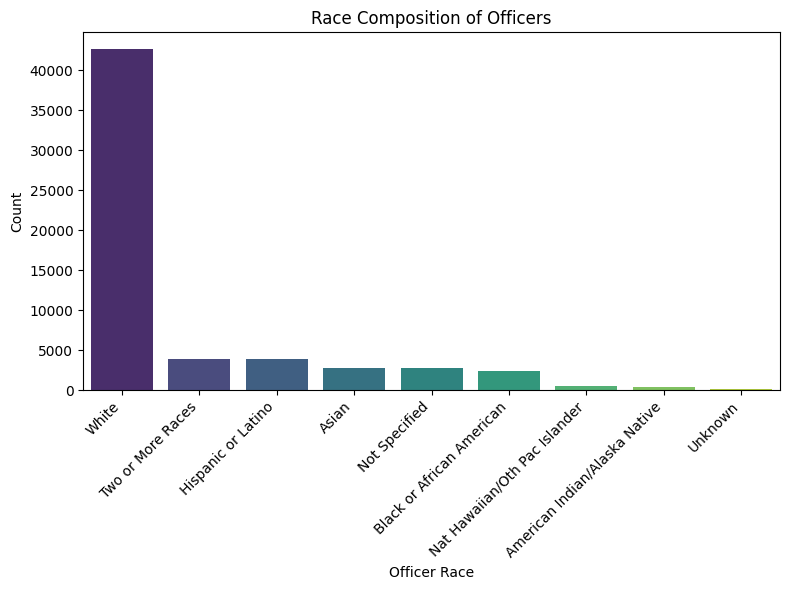

In [16]:
race_counts = race_relationship_data['Officer Race'].value_counts()

# Plotting the race composition
plt.figure(figsize=(8, 6))
sns.barplot(x=race_counts.index, y=race_counts.values, palette='viridis')
plt.title('Race Composition of Officers')
plt.xlabel('Officer Race')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()


c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


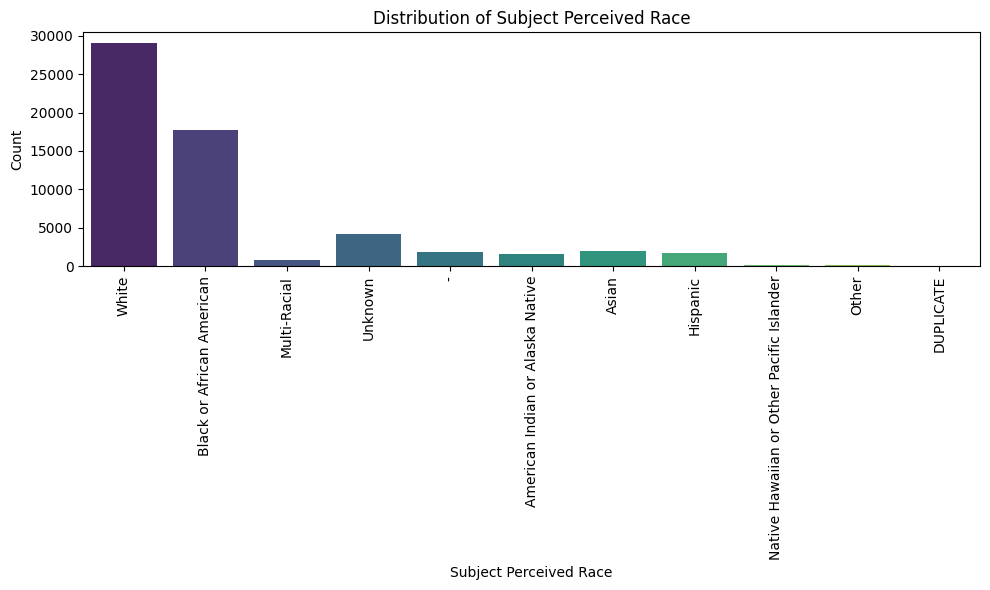

In [17]:
# Plotting the distribution of subject perceived race with rotated labels
plt.figure(figsize=(10, 6))
sns.countplot(x='Subject Perceived Race', data=race_relationship_data, palette='viridis')
plt.title('Distribution of Subject Perceived Race')
plt.xlabel('Subject Perceived Race')
plt.ylabel('Count')
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.show()

### Relationship between office and subject by race

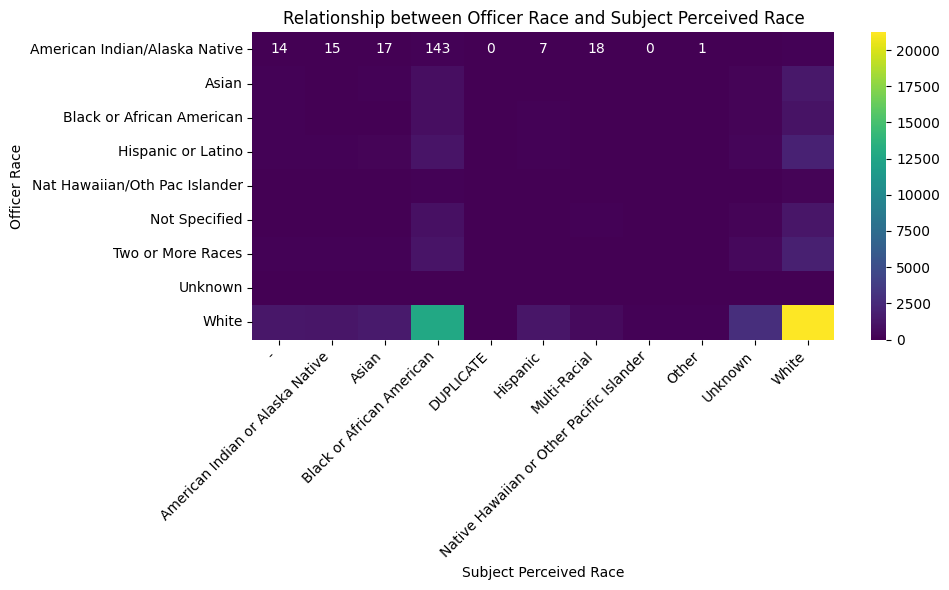

In [18]:

# Creating a pivot table to count occurrences of each combination of races
pivot_table = race_relationship_data.pivot_table(index='Officer Race', columns='Subject Perceived Race', aggfunc='size', fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='viridis')
plt.title('Relationship between Officer Race and Subject Perceived Race')
plt.xlabel('Subject Perceived Race')
plt.ylabel('Officer Race')
plt.xticks(rotation=45, ha='right')  
plt.yticks(rotation=0, va='center')  
plt.tight_layout()  
plt.show()

## Hypothesis Testing: Relationship Between Officer's Race and Stop Resolution

### Hypotheses:
- **Null Hypothesis (H0):** There is no association between the officer's race and the stop resolution.
- **Alternative Hypothesis (H1):** There is an association between the officer's race and the stop resolution.

### Finding:
Based on the small p-value obtained from the chi-square test (much smaller than the significance level of 0.05), we reject the null hypothesis in favor of the alternative hypothesis, indicating that there is indeed a significant association between the officer's race and the stop resolution.
This analysis suggests that the type of stop resolution is not independent of the officer's race, indicating potential biases or underlying factors influencing the stop resolution based on the officer's race.

In [19]:
from scipy.stats import chi2_contingency

# Creating a contingency table
contingency_table = pd.crosstab(race_relationship_data['Officer Race'], race_relationship_data['Stop Resolution'])

print("Contingency Table:")
print(contingency_table)

# Calculating chi-square statistic and p-value
chi2, p, _, _ = chi2_contingency(contingency_table)
print("\nChi-square Statistic:", chi2)
print("P-value:", p)

Contingency Table:
Stop Resolution                Arrest  Citation / Infraction  Field Contact  \
Officer Race                                                                  
American Indian/Alaska Native      79                      0            148   
Asian                             667                      8           1368   
Black or African American         494                     10           1240   
Hispanic or Latino                927                     19           2212   
Nat Hawaiian/Oth Pac Islander     111                      2            239   
Not Specified                     629                     16           1278   
Two or More Races                 998                     18           2039   
Unknown                            21                      1             69   
White                           10519                    140          20695   

Stop Resolution                Offense Report  Referred for Prosecution  
Officer Race                         

contingency table visualization

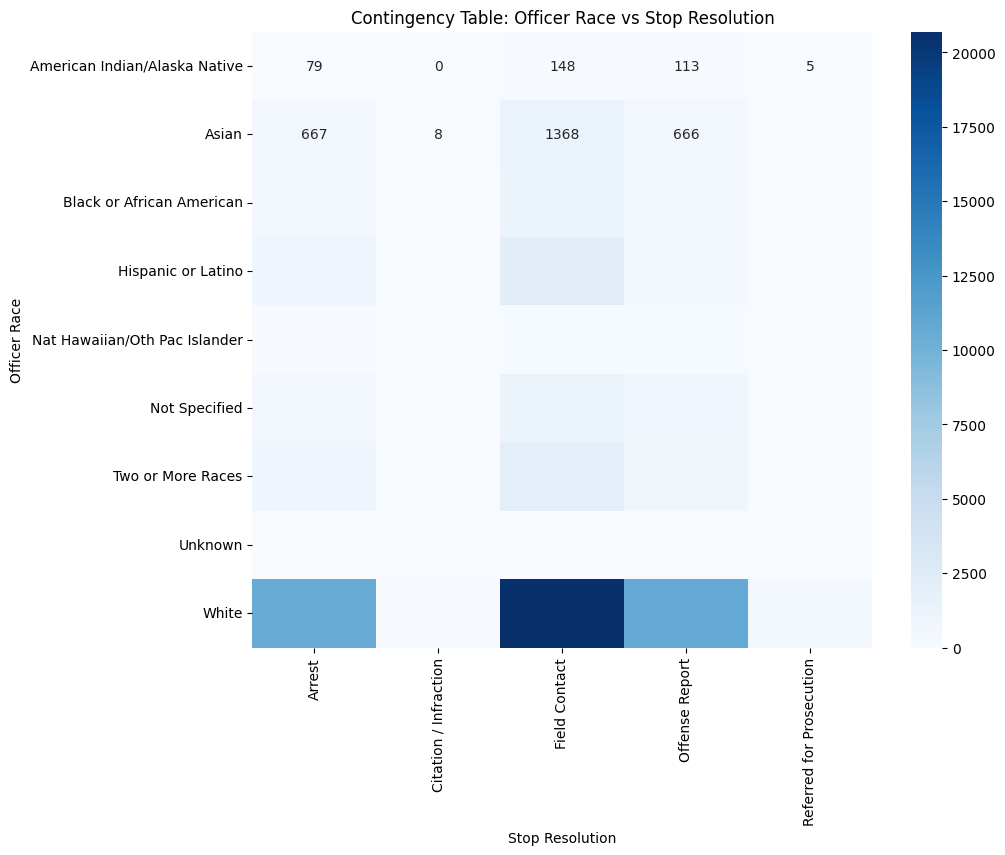

In [20]:

# Defining the contingency table
contingency_table = [[79, 0, 148, 113, 5],
                     [667, 8, 1368, 666, 28],
                     [494, 10, 1240, 610, 23],
                     [927, 19, 2212, 644, 33],
                     [111, 2, 239, 175, 5],
                     [629, 16, 1278, 755, 33],
                     [998, 18, 2039, 843, 37],
                     [21, 1, 69, 9, 0],
                     [10519, 140, 20695, 10678, 562]]

# Defining officer races and stop resolutions
officer_races = ['American Indian/Alaska Native', 'Asian', 'Black or African American', 
                 'Hispanic or Latino', 'Nat Hawaiian/Oth Pac Islander', 'Not Specified', 
                 'Two or More Races', 'Unknown', 'White']
stop_resolutions = ['Arrest', 'Citation / Infraction', 'Field Contact', 
                    'Offense Report', 'Referred for Prosecution']

# Creating a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d',
            xticklabels=stop_resolutions, yticklabels=officer_races, cbar=True)
plt.title('Contingency Table: Officer Race vs Stop Resolution')
plt.xlabel('Stop Resolution')
plt.ylabel('Officer Race')
plt.show()


### Stop resolutions in randomly selected areas

c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

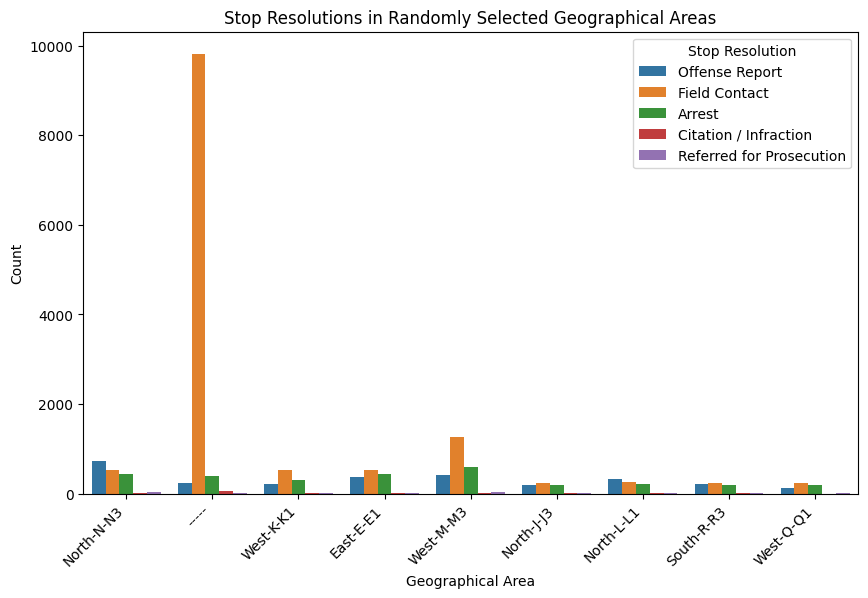

In [21]:
# Selecting random areas
random_areas = df['Geographical Area'].sample(n=11, random_state=42)  # Change n to the number of random areas you want

#  DataFrame filtr to include only randomly selected areas
df_random_areas = df[df['Geographical Area'].isin(random_areas)]

# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(data=df_random_areas, x='Geographical Area', hue='Stop Resolution')
plt.title('Stop Resolutions in Randomly Selected Geographical Areas')
plt.xlabel('Geographical Area')
plt.ylabel('Count')
plt.legend(title='Stop Resolution')
plt.xticks(rotation=45, ha='right')
plt.show()

### stop resolutions with weapons involvement

c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

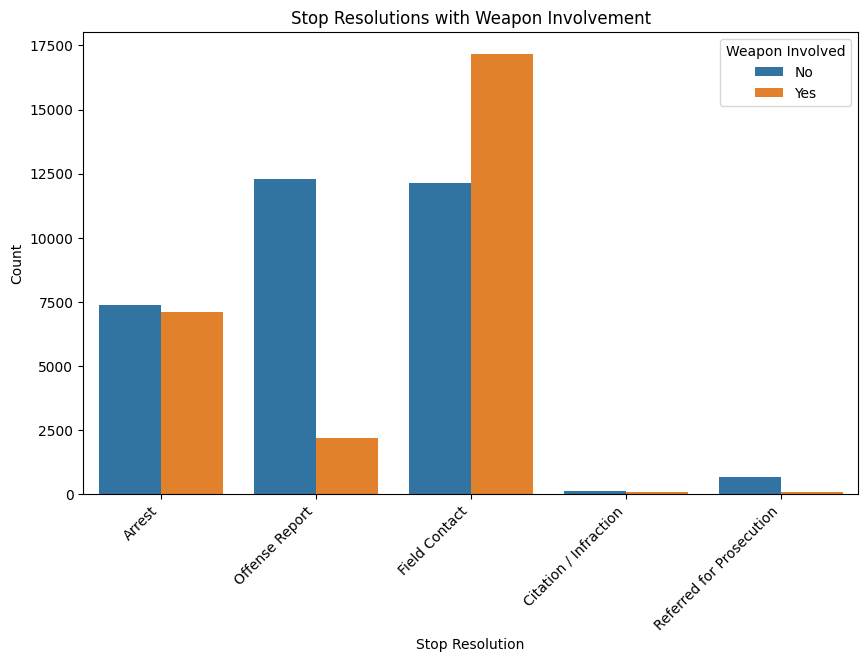

In [22]:
# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Stop Resolution', hue='Weapon Involved')
plt.title('Stop Resolutions with Weapon Involvement')
plt.xlabel('Stop Resolution')
plt.ylabel('Count')
plt.legend(title='Weapon Involved', labels=['No', 'Yes'])
plt.xticks(rotation=45, ha='right')
plt.show()

In [23]:
contingency_table = pd.crosstab(race_relationship_data['Stop Resolution'], [race_relationship_data['Officer Race'], race_relationship_data['Subject Perceived Race'], race_relationship_data['Geographical Area']])

# chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# results
print("Contingency Table:")
print(contingency_table)
print("\nChi-square Statistic:", chi2)
print("P-value:", p)

Contingency Table:
Officer Race             American Indian/Alaska Native                      \
Subject Perceived Race                               -                       
Geographical Area                                ----- East-C-C3 East-E-E3   
Stop Resolution                                                              
Arrest                                               0         0         0   
Citation / Infraction                                0         0         0   
Field Contact                                        2         1         0   
Offense Report                                       0         3         2   
Referred for Prosecution                             0         0         0   

Officer Race                                                          \
Subject Perceived Race                                                 
Geographical Area        South-O-O3 South-R-R1 South-R-R2 South-S-S3   
Stop Resolution                                               

<Figure size 1200x800 with 0 Axes>

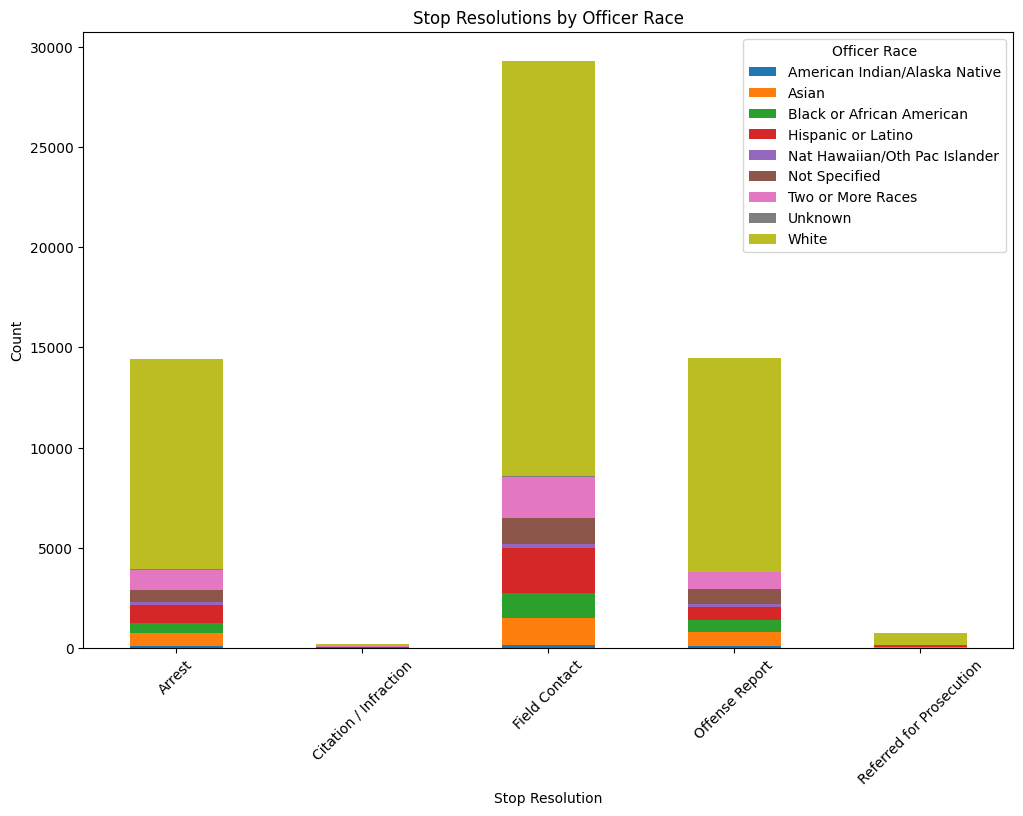

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# contingency table data
contingency_table = {
    'Stop Resolution': ['Arrest', 'Citation / Infraction', 'Field Contact', 'Offense Report', 'Referred for Prosecution'],
    'American Indian/Alaska Native': [79, 0, 148, 113, 5],
    'Asian': [667, 8, 1368, 666, 28],
    'Black or African American': [494, 10, 1240, 610, 23],
    'Hispanic or Latino': [927, 19, 2212, 644, 33],
    'Nat Hawaiian/Oth Pac Islander': [111, 2, 239, 175, 5],
    'Not Specified': [629, 16, 1278, 755, 33],
    'Two or More Races': [998, 18, 2039, 843, 37],
    'Unknown': [21, 1, 69, 9, 0],
    'White': [10519, 140, 20695, 10678, 562]
}

# Creating DataFrame
df_contingency = pd.DataFrame(contingency_table)
df_contingency.set_index('Stop Resolution', inplace=True)

# Plotting
plt.figure(figsize=(12, 8))
df_contingency.plot(kind='bar', stacked=True, figsize=(12,8))
plt.title('Stop Resolutions by Officer Race')
plt.xlabel('Stop Resolution')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Officer Race')
plt.show()


### BASELINE MODELLING

 developing simple, interpretable models using basic algorithms to establish a starting point for our analysis. 

In [25]:
# Performing one-hot encoding for categorical variables
categorical_cols = ['Officer Race', 'Subject Perceived Race', 'Geographical Area']
data_encoded = pd.get_dummies(race_relationship_data, columns=categorical_cols, drop_first=True)

# Splitting the data into features and target variable
X = data_encoded.drop('Stop Resolution', axis=1)
y = data_encoded['Stop Resolution']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
X_train

,Weapon Involved,Officer Race_Asian,Officer Race_Black or African American,Officer Race_Hispanic or Latino,Officer Race_Nat Hawaiian/Oth Pac Islander,Officer Race_Not Specified,Officer Race_Two or More Races,Officer Race_Unknown,Officer Race_White,Subject Perceived Race_American Indian or Alaska Native,...,Geographical Area_West-K-K2,Geographical Area_West-K-K3,Geographical Area_West-K-M3,Geographical Area_West-M-B3,Geographical Area_West-M-M1,Geographical Area_West-M-M2,Geographical Area_West-M-M3,Geographical Area_West-Q-Q1,Geographical Area_West-Q-Q2,Geographical Area_West-Q-Q3
13312,1,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
20020,1,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
16392,1,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
41314,0,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
40632,0,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54343,0,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
38158,0,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
860,0,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
15795,1,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [27]:
X_test

,Weapon Involved,Officer Race_Asian,Officer Race_Black or African American,Officer Race_Hispanic or Latino,Officer Race_Nat Hawaiian/Oth Pac Islander,Officer Race_Not Specified,Officer Race_Two or More Races,Officer Race_Unknown,Officer Race_White,Subject Perceived Race_American Indian or Alaska Native,...,Geographical Area_West-K-K2,Geographical Area_West-K-K3,Geographical Area_West-K-M3,Geographical Area_West-M-B3,Geographical Area_West-M-M1,Geographical Area_West-M-M2,Geographical Area_West-M-M3,Geographical Area_West-Q-Q1,Geographical Area_West-Q-Q2,Geographical Area_West-Q-Q3
45856,1,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
42047,0,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
40920,0,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
58834,1,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
35868,0,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53934,0,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
43343,0,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8582,1,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
49900,0,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False


In [28]:
y_train

13312               Field Contact
20020                      Arrest
16392               Field Contact
41314              Offense Report
40632                      Arrest
                   ...           
54343               Field Contact
38158    Referred for Prosecution
860                Offense Report
15795                      Arrest
56422               Field Contact
Name: Stop Resolution, Length: 47332, dtype: object

In [29]:
y_test

45856            Arrest
42047    Offense Report
40920    Offense Report
58834            Arrest
35868     Field Contact
              ...      
53934    Offense Report
43343            Arrest
8582      Field Contact
49900    Offense Report
22389     Field Contact
Name: Stop Resolution, Length: 11834, dtype: object

### MODELLING AND MODEL EVALUATION

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Instantiating logistic regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

logistic_model.fit(X_train, y_train)

# predictions on the training set
train_preds = logistic_model.predict(X_train)

# predictions on the testing set
test_preds = logistic_model.predict(X_test)

# model evaluation
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# The Classifications report/result
print("\nClassification Report:")
print(classification_report(y_test, test_preds, zero_division=1))



Training Accuracy: 0.6383630524803515
Testing Accuracy: 0.6368936961297955

Classification Report:
                          precision    recall  f1-score   support

                  Arrest       0.41      0.01      0.02      2885
   Citation / Infraction       1.00      0.00      0.00        50
           Field Contact       0.72      0.88      0.79      5854
          Offense Report       0.51      0.82      0.63      2896
Referred for Prosecution       1.00      0.00      0.00       149

                accuracy                           0.64     11834
               macro avg       0.73      0.34      0.29     11834
            weighted avg       0.60      0.64      0.55     11834



In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# model dicts.
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Naive Bayes': GaussianNB()
}

for name, model in models.items():
    # Training the model
    model.fit(X_train, y_train)
    
    # Predictions on the test set
    test_preds = model.predict(X_test)
    
    # model evaluation
    test_accuracy = accuracy_score(y_test, test_preds)
    
    # Classification report
    report = classification_report(y_test, test_preds)
    
    print(f"Model: {name}")
    print(f"Testing Accuracy: {test_accuracy}")
    print("Classification Report:")
    print(report)
    print()


Model: Decision Tree
Testing Accuracy: 0.6222748014196383
Classification Report:
                          precision    recall  f1-score   support

                  Arrest       0.37      0.16      0.23      2885
   Citation / Infraction       0.00      0.00      0.00        50
           Field Contact       0.72      0.84      0.77      5854
          Offense Report       0.53      0.68      0.60      2896
Referred for Prosecution       0.25      0.01      0.01       149

                accuracy                           0.62     11834
               macro avg       0.37      0.34      0.32     11834
            weighted avg       0.58      0.62      0.59     11834


Model: Random Forest
Testing Accuracy: 0.624049349332432
Classification Report:
                          precision    recall  f1-score   support

                  Arrest       0.37      0.14      0.20      2885
   Citation / Infraction       0.00      0.00      0.00        50
           Field Contact       0.72      0

c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_class

Model: AdaBoost
Testing Accuracy: 0.6095149569038364
Classification Report:
                          precision    recall  f1-score   support

                  Arrest       0.38      0.00      0.00      2885
   Citation / Infraction       0.00      0.00      0.00        50
           Field Contact       0.66      0.90      0.76      5854
          Offense Report       0.51      0.67      0.58      2896
Referred for Prosecution       0.00      0.00      0.00       149

                accuracy                           0.61     11834
               macro avg       0.31      0.31      0.27     11834
            weighted avg       0.54      0.61      0.52     11834




c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model: Gradient Boosting
Testing Accuracy: 0.6085009295250972
Classification Report:
                          precision    recall  f1-score   support

                  Arrest       0.40      0.04      0.07      2885
   Citation / Infraction       0.00      0.00      0.00        50
           Field Contact       0.64      0.91      0.75      5854
          Offense Report       0.54      0.61      0.57      2896
Referred for Prosecution       0.00      0.00      0.00       149

                accuracy                           0.61     11834
               macro avg       0.32      0.31      0.28     11834
            weighted avg       0.55      0.61      0.53     11834


Model: Naive Bayes
Testing Accuracy: 0.012168328544870712
Classification Report:
                          precision    recall  f1-score   support

                  Arrest       0.00      0.00      0.00      2885
   Citation / Infraction       0.00      0.90      0.01        50
           Field Contact       0.79  

### CROSS-VALIDATION
performing cross-validation to ensure that the model performance estimates are robust and not overly optimistic.

Random Forest has the highest mean cross-validation score, indicating better performance on average compared to the other models. Additionally, Random Forest has the lowest standard deviation among the models, suggesting more consistent performance across different folds. Therefore, based on these cross-validation results, Random Forest appears to be the best model among the ones tested.

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

# models for cross validation
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Performing cross-validation for each model
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"Model: {name}")
    print("Cross-validation scores:", cv_scores)
    print("Mean CV score:", cv_scores.mean())
    print("Standard deviation of CV scores:", cv_scores.std())
    print()

Model: Decision Tree
Cross-validation scores: [0.61381641 0.62131615 0.61831819 0.62043102 0.6211705 ]
Mean CV score: 0.6190104556821096
Standard deviation of CV scores: 0.0028091751366582265

Model: Random Forest
Cross-validation scores: [0.61878103 0.62437942 0.62159307 0.62233256 0.62581872]
Mean CV score: 0.6225809600580584
Standard deviation of CV scores: 0.0024163883947498138



c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circum

Model: AdaBoost
Cross-validation scores: [0.60589416 0.60705609 0.5970843  0.60162688 0.60638073]
Mean CV score: 0.6036084312223066
Standard deviation of CV scores: 0.0037759071676580717

Model: Gradient Boosting
Cross-validation scores: [0.6099081  0.61117566 0.6055356  0.60595817 0.60891612]
Mean CV score: 0.6082987305352914
Standard deviation of CV scores: 0.002207311146675354



checking for overfitting

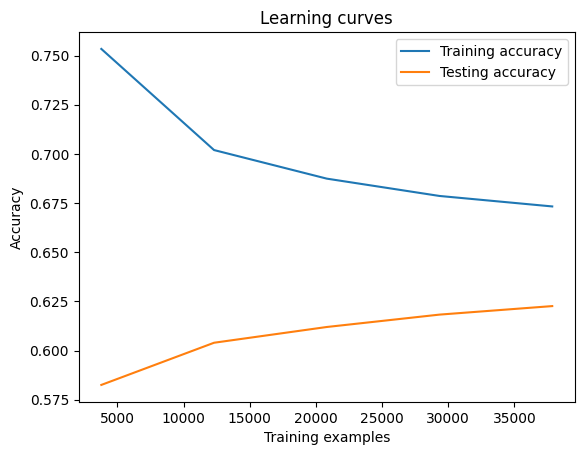

In [33]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), X_train, y_train, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

#plotting
plt.plot(train_sizes, train_scores_mean, label='Training accuracy')
plt.plot(train_sizes, test_scores_mean, label='Testing accuracy')
plt.xlabel('Training examples')
plt.ylabel('Accuracy')
plt.title('Learning curves')
plt.legend()
plt.show()


### HYPERPARAMETER TUNING

optimizing the performance of machine learning models.

I selected random forest as my best model and performed hyperparameter tuning on it

In [34]:
import random
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Setting random seed for Python
random.seed(42)

# Setting random seed for NumPy
np.random.seed(42)

# Defining the hyperparameter distributions
param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False]
}

# Instantiating the model
rf = RandomForestClassifier(random_state=42)

# Performing random search
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', random_state=42)

# Fitting the random search to the data
random_search.fit(X_train, y_train)

# Evaluating the best model
best_rf = random_search.best_estimator_
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Model:", best_rf)
print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)


Best Model: RandomForestClassifier(min_samples_leaf=5, min_samples_split=18,
                       n_estimators=180, random_state=42)
Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 18, 'n_estimators': 180}
Best Cross-Validation Score: 0.6335037690612587


hyperparameter tuning modell evalution

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# predictions on the test set
test_preds = best_rf.predict(X_test)

# Calculating evaluation metrics
accuracy = accuracy_score(y_test, test_preds)
precision = precision_score(y_test, test_preds, average='weighted')
recall = recall_score(y_test, test_preds, average='weighted')
f1 = f1_score(y_test, test_preds, average='weighted')
conf_matrix = confusion_matrix(y_test, test_preds)

# evaluation metrics
print("Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\nConfusion Matrix:")
print(conf_matrix)


c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Evaluation Metrics:
Accuracy: 0.6318235592360993
Precision: 0.5743084601067211
Recall: 0.6318235592360993
F1 Score: 0.563522422294441

Confusion Matrix:
[[ 178    0 1535 1172    0]
 [   3    0   34   13    0]
 [  67    0 5185  602    0]
 [ 178    0  604 2114    0]
 [  18    0   21  110    0]]


### STORING MY HYPERPARAMETER VALUES SO THAT I DONT RUN THEM EVERYTIME

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming you have your trained model stored in 'best_rf' and your test data stored in 'X_test' and 'y_test'
y_pred = best_rf.predict(X_test)

# Calculating evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculating confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Evaluation Metrics:
Accuracy: 0.6318235592360993
Precision: 0.3261242500336178
Recall: 0.3354779964561082
F1 Score: 0.30054371661139523

Confusion Matrix:
[[ 178    0 1535 1172    0]
 [   3    0   34   13    0]
 [  67    0 5185  602    0]
 [ 178    0  604 2114    0]
 [  18    0   21  110    0]]


getting the data that was misclassified and visualizing them

Misclassified Instances:
       Weapon Involved  Officer Race_Asian  \
45856                1               False   
58834                1               False   
48763                0                True   
4265                 0               False   
48584                1               False   
...                ...                 ...   
10602                1               False   
11107                0               False   
52209                1               False   
3481                 0               False   
43343                0                True   

       Officer Race_Black or African American  \
45856                                   False   
58834                                   False   
48763                                   False   
4265                                    False   
48584                                   False   
...                                       ...   
10602                                   False   
11107                         

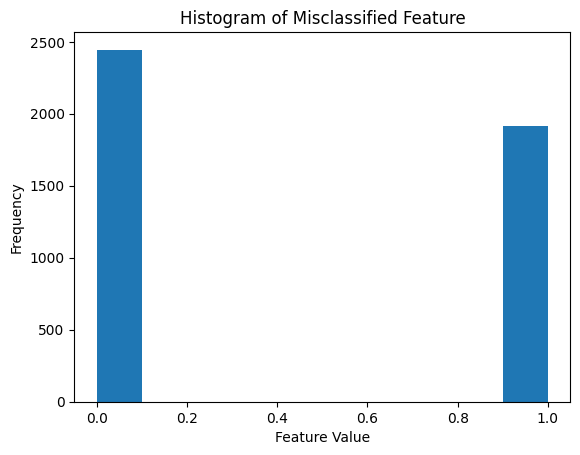

In [37]:
# Identifing misclassified instances
misclassified_indices = y_test != test_preds
misclassified_instances = X_test[misclassified_indices]
true_labels = y_test[misclassified_indices]
predicted_labels = test_preds[misclassified_indices]

# Examining the features of misclassified instances
print("Misclassified Instances:")
print(misclassified_instances)

# Visualizing data 
import matplotlib.pyplot as plt

# Visualizing data
plt.hist(misclassified_instances.iloc[:, 0])  # Replace 0 with the index of the feature you want to visualize
plt.xlabel("Feature Value")
plt.ylabel("Frequency")
plt.title("Histogram of Misclassified Feature")
plt.show()



### MODEL COMPARISON VISUALIZATION

c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalD

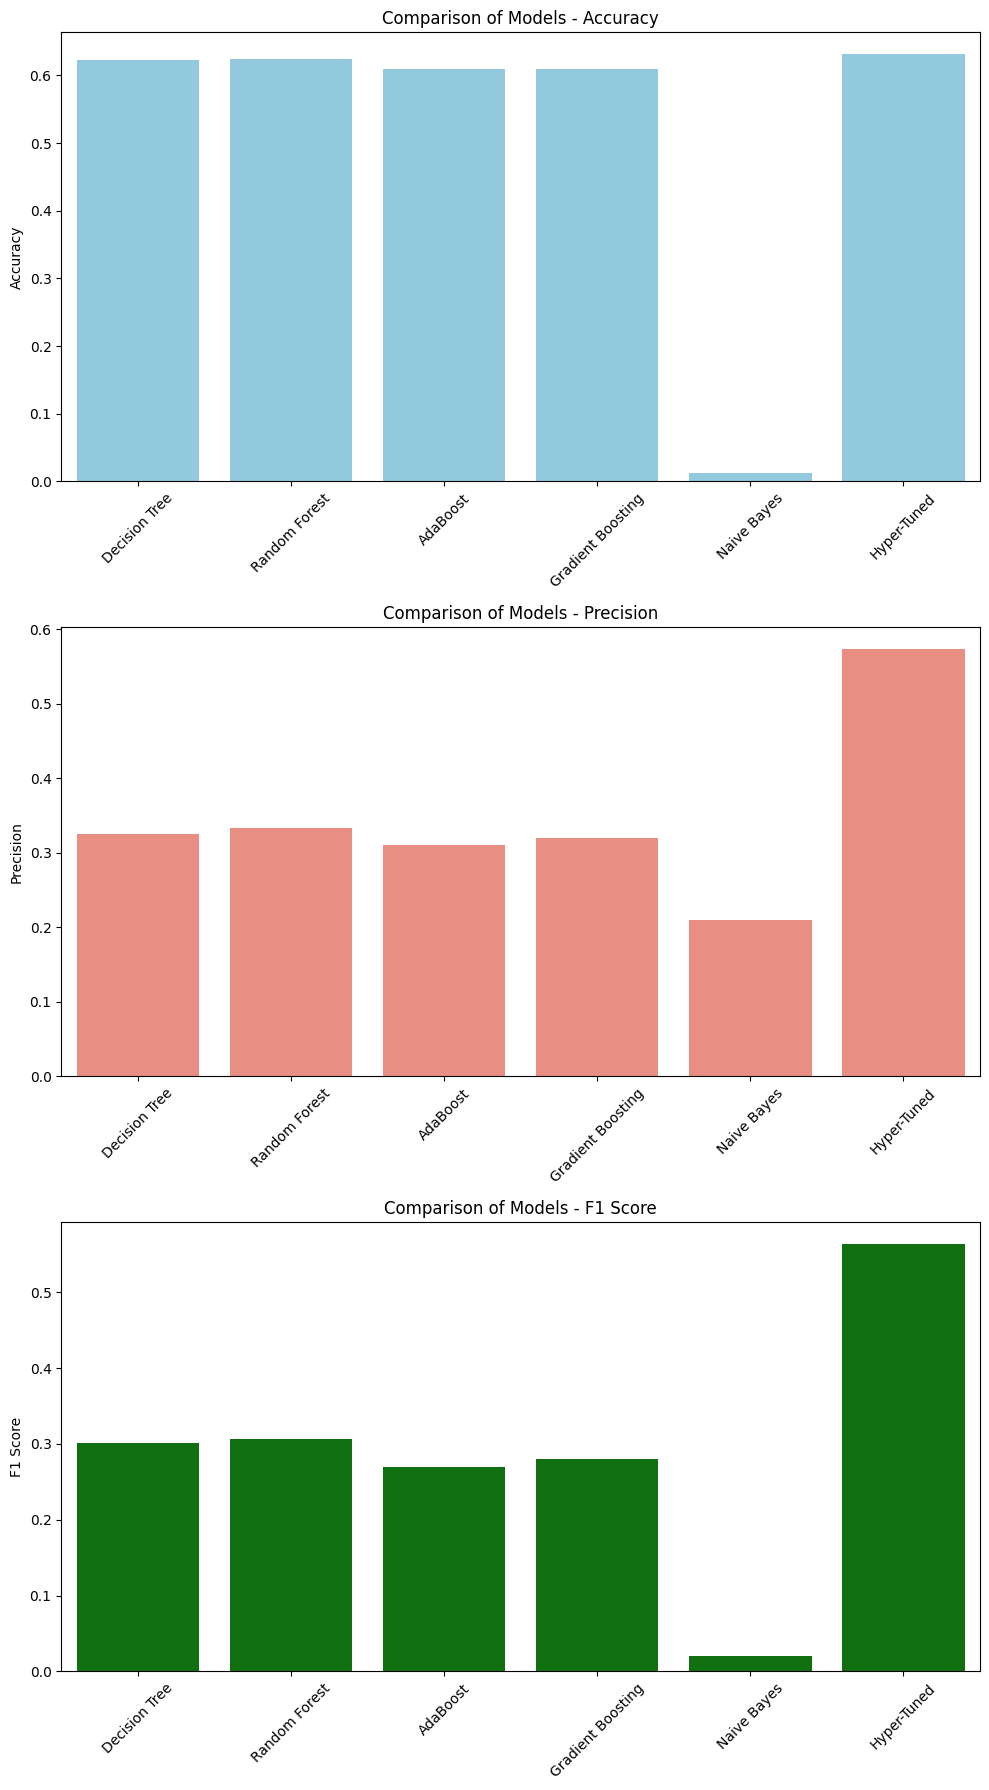

In [41]:

import matplotlib.pyplot as plt
import seaborn as sns

# Models
models = ['Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting', 'Naive Bayes', 'Hyper-Tuned']

# Evaluation metrics for each model
accuracy = [0.622, 0.624, 0.610, 0.609, 0.012, 0.632]
precision = [0.326, 0.333, 0.310, 0.320, 0.210, 0.574]
f1_score = [0.301, 0.306, 0.270, 0.280, 0.020, 0.564]

# Creating three separate subplots for each evaluation metric
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# Plotting Accuracy
sns.barplot(x=models, y=accuracy, ax=axes[0], color='skyblue')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Comparison of Models - Accuracy')

# Plotting Precision
sns.barplot(x=models, y=precision, ax=axes[1], color='salmon')
axes[1].set_ylabel('Precision')
axes[1].set_title('Comparison of Models - Precision')

# Plotting F1 Score
sns.barplot(x=models, y=f1_score, ax=axes[2], color='green')
axes[2].set_ylabel('F1 Score')
axes[2].set_title('Comparison of Models - F1 Score')

# Rotating x-axis labels for better readability
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Adjusting the layout
plt.tight_layout()

# Displaying the plot
plt.show()


### CONCLUSION

Different classification models were utilized in this analysis, including Random Forest, Hyper Tuned Random Forest, AdaBoost, and Naive Bayes. The results indicated that the Hyper Tuned Random Forest outperformed the other models, followed closely by Random Forest and AdaBoost, while Naive Bayes demonstrated the poorest performance.

Moreover, the study revealed a correlation between the race of the officer and the resolution of stops, suggesting that stop resolution is influenced by the officer's race. This finding implies the existence of potential biases or underlying factors affecting stop outcomes based on the officer's race. It suggests that officers of different races may exhibit varying tendencies or behaviors during stop situations, leading to disparities in stop resolutions.

The association between the officer's race and stop resolution underscores the importance of addressing potential biases in law enforcement practices. It calls for further investigation and interventions aimed at mitigating systemic disparities and ensuring fairness and equity in stop resolutions, irrespective of the officer's race. These efforts are essential for building trust and confidence in law enforcement agencies and promoting equal treatment and justice for all individuals within the community